In [116]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from   matplotlib.colors import LogNorm

import compute_charge_dist as fz

from scipy.optimize import curve_fit

import time

%matplotlib inline


#grain_type = "silicate"
grain_type = "carbonaceous"
pcent      = 1

include_500_1000 = True

########################################################################################

grain_size = 3

save_dir = "/home/jcibanezm/Dropbox/codes/run/ChargeStatisticsAnalysis/Daikaiju"
filename = "fz_%.4iAA_%s_CR_True_%i_pcent.pkl"%(grain_size, grain_type, pcent) 

pkl_file    = open("%s/%s"%(save_dir, filename), "rb")
cdist_3AA = pickle.load(pkl_file)
pkl_file.close

########################################################################################

grain_size = 5

save_dir = "/home/jcibanezm/Dropbox/codes/run/ChargeStatisticsAnalysis/Daikaiju"
filename = "fz_%.4iAA_%s_CR_True_%i_pcent.pkl"%(grain_size, grain_type, pcent) 

pkl_file    = open("%s/%s"%(save_dir, filename), "rb")
cdist_5AA = pickle.load(pkl_file)
pkl_file.close

########################################################################################

grain_size = 10

save_dir = "/home/jcibanezm/Dropbox/codes/run/ChargeStatisticsAnalysis/Daikaiju"
filename = "fz_%.4iAA_%s_CR_True_%i_pcent.pkl"%(grain_size, grain_type, pcent) 

pkl_file    = open("%s/%s"%(save_dir, filename), "rb")
cdist_10AA = pickle.load(pkl_file)
pkl_file.close

########################################################################################

grain_size = 50

save_dir = "/home/jcibanezm/Dropbox/codes/run/ChargeStatisticsAnalysis/Daikaiju"
filename = "fz_%.4iAA_%s_CR_True_%i_pcent.pkl"%(grain_size, grain_type, pcent) 

pkl_file    = open("%s/%s"%(save_dir, filename), "rb")
cdist_50AA = pickle.load(pkl_file)
pkl_file.close

########################################################################################

grain_size = 100

save_dir = "/home/jcibanezm/Dropbox/codes/run/ChargeStatisticsAnalysis/Daikaiju"
filename = "fz_%.4iAA_%s_CR_True_%i_pcent.pkl"%(grain_size, grain_type, pcent) 

pkl_file    = open("%s/%s"%(save_dir, filename), "rb")
cdist_100AA = pickle.load(pkl_file)
pkl_file.close

########################################################################################

if include_500_1000 == True:
    print("Loading the charge distribution for 500 and 1000 Angstrom grains")
    grain_size = 500
    pcent      = 0.1

    save_dir = "/home/jcibanezm/Dropbox/codes/run/ChargeStatisticsAnalysis/Daikaiju"
    filename = "fz_%.4iAA_%s_CR_True_%i_pcent.pkl"%(grain_size, grain_type, pcent) 

    pkl_file    = open("%s/%s"%(save_dir, filename), "rb")
    cdist_500AA = pickle.load(pkl_file)
    pkl_file.close

    ########################################################################################

    grain_size = 1000

    save_dir = "/home/jcibanezm/Dropbox/codes/run/ChargeStatisticsAnalysis/Daikaiju"
    filename = "fz_%.4iAA_%s_CR_True_%i_pcent.pkl"%(grain_size, grain_type, pcent) 

    pkl_file    = open("%s/%s"%(save_dir, filename), "rb")
    cdist_1000AA = pickle.load(pkl_file)
    pkl_file.close


Loading the charge distribution for 500 and 1000 Angstrom grains


In [117]:
import yt

# Input variables.
data_dir   = "/home/jcibanezm/codes/run/Silcc/CF_Prabesh"
filename   = data_dir + "/NL99_R8_cf_hdf5_chk_0028"

pf = yt.load("%s"%(filename))

c  = [0,0,0]
le = [-4.93696000e+19, -4.93696000e+19, -4.93696000e+19]
re = [ 4.93696000e+19,  4.93696000e+19,  4.93696000e+19]

box = pf.box(le, re)

yt : [INFO     ] 2018-11-08 16:05:53,535 Particle file found: NL99_R8_cf_hdf5_chk_0028
yt : [INFO     ] 2018-11-08 16:05:53,541 integer runtime parameter checkpointfilenumber overwrites a simulation scalar of the same name
yt : [INFO     ] 2018-11-08 16:05:53,542 integer runtime parameter forcedplotfilenumber overwrites a simulation scalar of the same name
yt : [INFO     ] 2018-11-08 16:05:53,543 integer runtime parameter nbegin overwrites a simulation scalar of the same name
yt : [INFO     ] 2018-11-08 16:05:53,543 integer runtime parameter plotfilenumber overwrites a simulation scalar of the same name
yt : [INFO     ] 2018-11-08 16:05:53,560 Parameters: current_time              = 5.68049127342e+14
yt : [INFO     ] 2018-11-08 16:05:53,561 Parameters: domain_dimensions         = [32  8  8]
yt : [INFO     ] 2018-11-08 16:05:53,562 Parameters: domain_left_edge          = [ -1.97478400e+20  -4.93696000e+19  -4.93696000e+19]
yt : [INFO     ] 2018-11-08 16:05:53,563 Parameters: domain_righ

In [118]:
np.random.seed(1)
#np.random.seed(2)

ncells = len(box["dens"])
n5     = np.int(ncells * 0.01)
#n5 = int(1.0e3)
rand_index = np.random.randint(0, ncells, n5)

In [119]:
print(n5)

85949


In [120]:
print(len(cdist_5AA["nH"]))

85943


In [121]:
to_del = []
for i in range(6):
    to_del.append(n5 - (i+1))
to_del = np.array(to_del)

rand_index = np.delete(rand_index, to_del)

In [122]:
cfl_time  = np.array(box["courant_time_step"][rand_index])

In [123]:
n1     = np.int(ncells * 0.001)

In [124]:
print(n1)

8594


In [125]:
print(len(cdist_500AA["nH"]))
print(len(cdist_1000AA["nH"]))

8591
8579


In [126]:
# For the 500 and 1000 grain size.

n1     = np.int(ncells * 0.001)
rand_index1 = np.random.randint(0, ncells, n1)

# For the 500 and 1000 grain sizes.
to_del1 = []
to_del2 = []
if grain_type == "carbonaceous": delnum = 14
if grain_type == "silicate": delnum1, delnum2 = 3, 15
for i in range(delnum1):
    to_del1.append(n1 - (i+1))
to_del1 = np.array(to_del1)
for i in range(delnum2):
    to_del2.append(n1 - (i+1))
to_del2 = np.array(to_del2)

rand_index500 = np.delete(rand_index1, to_del1)
rand_index1000 = np.delete(rand_index1, to_del2)

In [127]:
cfl_time_500   = np.array(box["courant_time_step"][rand_index500])
cfl_time_1000  = np.array(box["courant_time_step"][rand_index1000])

In [128]:
if grain_type == "carbonaceous":
    ii = 0
    for key in cdist_1000AA.keys():
        #arrs.append(0)
        if key!="Qabs_mean" and key!="grain_size" and key!="grain_type" and key!="MPI" and key!="fdist" and key!="info" and key!="zminmax" and key!="ZZ":
            #print(key)
            cdist_1000AA[key] = np.delete(cdist_1000AA[key], [8581, 8580])
        #ii +=1

In [129]:
tauz_dyntime_3AA   = cdist_3AA["tauz"]/cfl_time
tauz_dyntime_5AA   = cdist_5AA["tauz"]/cfl_time
tauz_dyntime_10AA  = cdist_10AA["tauz"]/cfl_time
tauz_dyntime_50AA  = cdist_50AA["tauz"]/cfl_time
tauz_dyntime_100AA = cdist_100AA["tauz"]/cfl_time
if include_500_1000 == True:
    tauz_dyntime_500AA  = cdist_500AA["tauz"]/cfl_time_500
    tauz_dyntime_1000AA = cdist_1000AA["tauz"]/cfl_time_1000

In [130]:
if include_500_1000 == True:
    size = np.concatenate((np.zeros_like(rand_index)+3.5, np.zeros_like(rand_index)+5, np.zeros_like(rand_index)+10, np.zeros_like(rand_index)+50, np.zeros_like(rand_index)+100, np.zeros_like(rand_index500)+500, np.zeros_like(rand_index1000)+1000))
    tt = np.concatenate((tauz_dyntime_3AA, tauz_dyntime_5AA, tauz_dyntime_10AA,  tauz_dyntime_50AA,  tauz_dyntime_100AA, tauz_dyntime_500AA, tauz_dyntime_1000AA))
else:
    size = np.concatenate((np.zeros_like(rand_index)+3.5, np.zeros_like(rand_index)+5, np.zeros_like(rand_index)+10, np.zeros_like(rand_index)+50, np.zeros_like(rand_index)+100))
    tt = np.concatenate((tauz_dyntime_3AA, tauz_dyntime_5AA, tauz_dyntime_10AA,  tauz_dyntime_50AA,  tauz_dyntime_100AA))


In [131]:
import pandas as pd
import seaborn as sns

In [132]:
df = pd.DataFrame({"size":size, "timescale":tt, "log_timescale":np.log10(tt)})

In [133]:
print(plt.style.available)

[u'seaborn-darkgrid', u'seaborn-notebook', u'classic', u'seaborn-ticks', u'grayscale', u'bmh', u'seaborn-talk', u'dark_background', u'ggplot', u'fivethirtyeight', u'seaborn-colorblind', u'seaborn-deep', u'seaborn-whitegrid', u'seaborn-bright', u'seaborn-poster', u'seaborn-muted', u'seaborn-paper', u'seaborn-white', u'seaborn-pastel', u'seaborn-dark', u'seaborn-dark-palette']


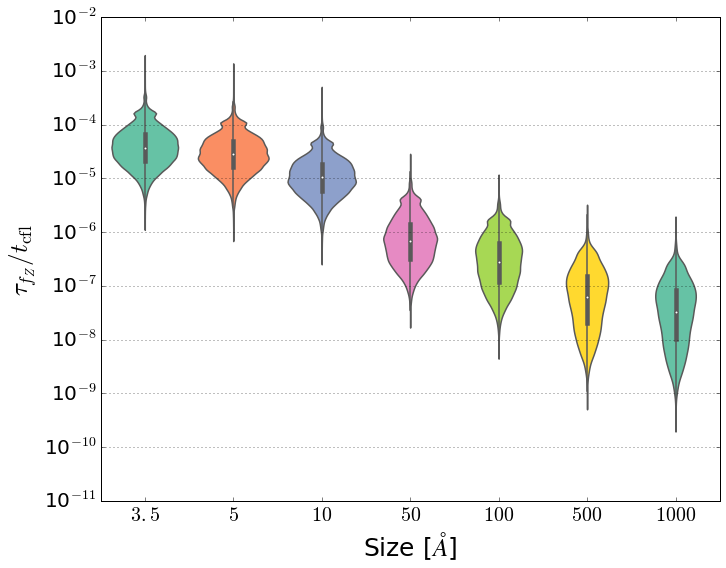

In [134]:
#plt.style.use('seaborn-notebook')
#sns.reset_orig()
#sns.reset_defaults()
fig = plt.figure(figsize=(10,8))

#ax = fig.add_subplot(111)

# Formatting tick labels in log scale.
def format_func(value, tick_number):
    return "10$^{%i}$"%value

def format_func2(value, tick_number):
    sizehere = ["3.5", "5", "10", "50", "100", "500", "1000"]
    return "$%s$"%sizehere[value]

#ax = fig.add_axes([0.13, 0.11, 0.86, 0.84])
ax = fig.add_axes([0.13, 0.11, 0.86, 0.84], axisbg='white')

#sns.set_style("whitegrid")
sns.violinplot(ax=ax, x="size", y="log_timescale", data=df, palette=sns.color_palette("Set2"), saturation=1.0, linewidth=1.5)

ax.set_ylabel("$\\tau_{f_{Z}} / t_{\mathrm{cfl}}$", fontsize=25)
ax.set_xlabel("Size [$\AA$]", fontsize=25)

ax.tick_params(axis='both', which='major', labelsize=20)
ax.tick_params(axis='both', which='minor', labelsize=20)

ax.grid("on", which="major", axis="y", color="black")

ax.yaxis.set_major_formatter(plt.FuncFormatter(format_func))
ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func2))


fig.show()

fig.savefig("/home/jcibanezm/Dropbox/Projects/Papers/In_Progress/ChargeDist_Dust/Figures/Charge_eq_%s.pdf"%grain_type, format="pdf", transparent=True)

In [41]:
print("------------------------")
print("3.5", np.median(tauz_dyntime_3AA))
print("5", np.median(tauz_dyntime_5AA))
print("10", np.median(tauz_dyntime_10AA))
print("50", np.median(tauz_dyntime_50AA))
print("100", np.median(tauz_dyntime_100AA))
if include_500_1000:
    print("500", np.median(tauz_dyntime_500AA))
    print("1000", np.median(tauz_dyntime_1000AA))

------------------------
('3.5', 4.8841305215000791e-05)
('5', 2.8671579610466211e-05)
('10', 9.2234307198469735e-06)
('50', 5.5427497954143977e-07)
('100', 2.3226811814508386e-07)
('500', 4.8540246765728149e-08)
('1000', 2.6561403405938609e-08)


In [42]:
np.percentile(tauz_dyntime_3AA, 95)

0.00020898732560799811